In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('height-weight.csv')

In [16]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

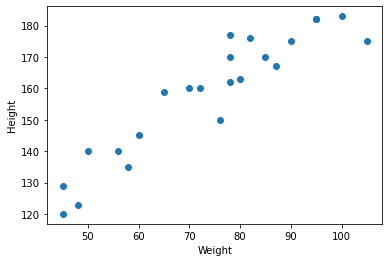

In [30]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [32]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [39]:
X = df[['Weight']] ## Independent feature
Y = df['Height'] ## Dependent feature

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [148]:
model = LinearRegression()

In [150]:
model.fit(X_train,y_train)

LinearRegression()

In [87]:
print("Coefficient or slope: ",model.coef_) #slope m

Coefficient or slope:  [17.03440872]


In [93]:
print("Intercept (b): ",model.intercept_)

Intercept (b):  157.5


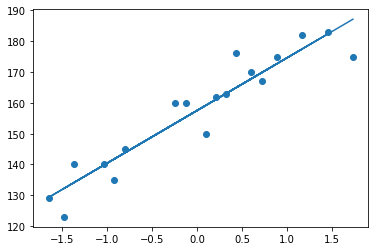

In [99]:
##plot with Training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

In [124]:
## Prediction for test data
y_pred = model.predict(X_test)
print(y_pred)

[161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [118]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [116]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [120]:
score = r2_score(y_test,y_pred)

In [122]:
print(score)

0.7769869860423441


In [126]:
##OLS linear regression
import statsmodels.api as sm

In [138]:
modelOLS = sm.OLS(y_train,X_train).fit()

In [140]:
prediction = modelOLS.predict(X_test)
print(prediction)

[  3.58467086   3.58467086 -28.1958439   19.95645118  -8.93492586]


In [142]:
print(modelOLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                       0.661
Time:                        03:12:30   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [152]:
## Prediction for new data
model.predict(scaler.transform([[72]]))

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.30639545])